In [1]:
library("ggplot2")
library("directlabels")
library("ggrepel")

In [2]:
cwd = getwd()
data = read.csv(file=sprintf("%s/data/python_entropy_analysis/entropy_correlation_data_75perc.csv", cwd))
data_df = data.frame(data)

In [3]:
data_df

X,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy,r
<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
0,IC-01,0.7451684,Temporo-Limbic,IC-18,0.5858180,0.6153400
1,IC-02,0.6112560,Fronto-Striatal,IC-14,0.5758031,0.6151892
2,IC-03,0.7036485,Ventral Attention,IC-16,0.7755597,0.5234964
3,IC-11,0.5386594,Auditory,IC-07,0.4048970,0.5151314
4,IC-20,0.0000000,Medial Visual,IC-20,0.2694202,0.4819234
5,IC-09,0.5357182,Cognitive Control,IC-17,0.7279436,0.4161618
6,IC-12,0.7674083,Salience,IC-04,0.8228313,0.4313501
7,IC-07,0.4656765,R. Cent. Executive,IC-09,0.6613508,0.3885926
8,IC-16,0.7117750,L. Cent. Executive,IC-03,0.7220418,0.3359827



Call:
lm(formula = data_df$B.Entropy ~ data_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17968 -0.07888 -0.03120  0.09560  0.16291 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)        0.25891    0.08824   2.934  0.01162 * 
data_df$A.Entropy  0.60458    0.15314   3.948  0.00167 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1089 on 13 degrees of freedom
Multiple R-squared:  0.5452,	Adjusted R-squared:  0.5103 
F-statistic: 15.59 on 1 and 13 DF,  p-value: 0.001668


[1] "Cook threshold: 0.307692 "

ERROR: Error in model.frame.default(formula = new_df$B.Entropy ~ new_df$E.entropy, : invalid type (NULL) for variable 'new_df$E.entropy'


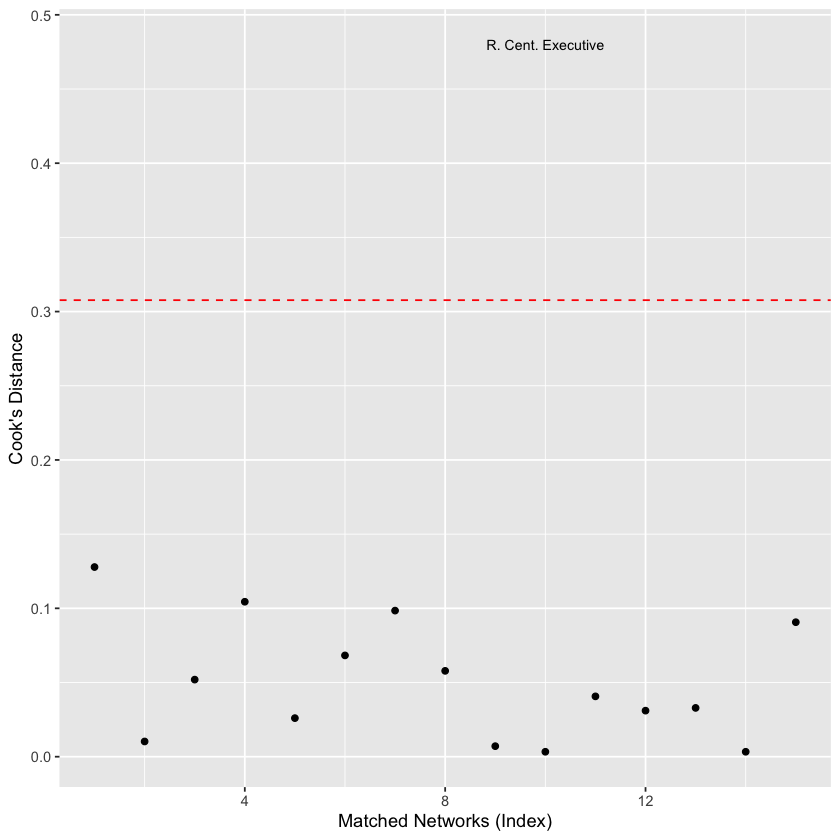

In [4]:
# create cook's plot\
# remove medial visual
# data_df <- data_df[-c(5), ] 
lm = lm(data_df$B.Entropy~data_df$A.Entropy)
summary(lm)

#Y~X (Alteration Entropy is Dependent Variable)
fit <- lm(data_df$B.Entropy~data_df$A.Entropy)

#identify D values > 4/(n-k-1) 
cutoff <- 4/((15 - 1 - 1)) 

sprintf("Cook threshold: %f ", cutoff)

data_df$cd<-cooks.distance(fit)
data_df$index<-1:15

p = ggplot(data_df,aes(index,cd)) +
  geom_point() +
  geom_hline(yintercept=cutoff, linetype="dashed", color = "red") +
  xlab("Matched Networks (Index)") +
  ylab("Cook's Distance") + 
  annotate("text", label="R. Cent. Executive", x=10, y=0.48, size=3) 

p

ggsave(sprintf("%s/figures/sup_figure_3_60perc.png",cwd), width = 4.5, height = 4, units = "in", dpi = 500)

#Data Frame with r. cent. executive removed
new_df <- data_df[-c(10), ]
lm = lm(new_df$B.Entropy~new_df$E.entropy)




Call:
lm(formula = new_df$B.Entropy ~ new_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17968 -0.07888 -0.03120  0.09560  0.16291 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)       0.25891    0.08824   2.934  0.01162 * 
new_df$A.Entropy  0.60458    0.15314   3.948  0.00167 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1089 on 13 degrees of freedom
Multiple R-squared:  0.5452,	Adjusted R-squared:  0.5103 
F-statistic: 15.59 on 1 and 13 DF,  p-value: 0.001668


[1] "P-Values of Coefficients"


(Intercept) new_df$A.Entropy 
    0.0058110066     0.0008340147

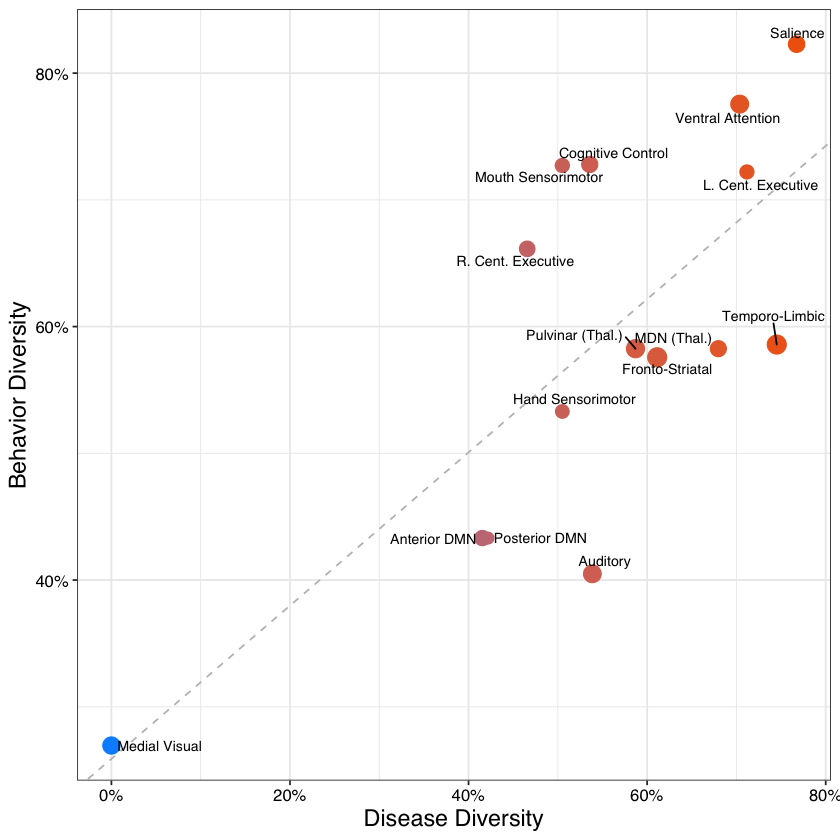

In [5]:
# create linear model (without r cent executive network)
# new_df <- data_df[-c(4), ]
# lm = lm(new_df$B.Entropy~new_df$A.Entropy)
# res <- summary(lm)

new_df <- data_df
lm = lm(new_df$B.Entropy~new_df$A.Entropy)
res <- summary(lm)
summary(lm)

# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(new_df, aes(A.Entropy,B.Entropy))

# plot linear model (without r. cent. exectuive)
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = new_df$r, color = lm$fitted.values), show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=new_df$Labels), size = 3, family="Helvetica") + #add data labels without overlap
    ylab("Behavior Diversity") +
    xlab("Disease Diversity") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    scale_color_gradient(low = "#0091ff", high = "#f0650e") +
#     annotate("point", x = 0.57, y = 0.93, size = 4, colour = "gray") +
#     annotate("text", label="R. Cent. Executive", x=0.6, y=0.91, size=3, family="Helvetica") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica"))
  
p 

ggsave(sprintf("%s/figures/linear_model_75perc.png",cwd), width = 4.5, height = 4, units = "in", dpi = 500)